In [105]:
# Các thư viện thông dụng

import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy 
from scipy import stats  

# Thư viện trực quan hóa dữ liệu

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# Các phép kiểm định

from scipy.stats import shapiro
from scipy.special import kolmogorov
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal


# Hậu kiểm ANOVA

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# figuer 
%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})

In [30]:
df = pd.read_csv('Diem.csv')
df.head(15)

,Mã SV,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
0,1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,0,2.04
1,2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,0,2.03
2,3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,0,2.09
3,4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,0,0.00
4,5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,0,1.78
5,6,7.55,0.80,318,31,Nam,Kinh,1,0,2.00,0,0.00
6,7,7.55,0.80,318,31,Nam,Kinh,2,17,2.73,0,2.00
7,8,6.71,1.00,383,66,Nam,Kinh,1,91,2.80,0,2.35
8,9,6.71,1.00,383,66,Nam,Kinh,2,106,2.60,0,2.41
9,10,5.52,1.14,44,27,Nam,Khác,1,0,1.29,0,0.00


# Data information

In [31]:
df.info()
print('-'*40,'\n','Shape :',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mã SV             731 non-null    int64  
 1   Điểm TBTN         731 non-null    float64
 2   Tỉ lệ Văn/Toán    731 non-null    float64
 3   Tổng HS           731 non-null    int64  
 4   Hạng PT           731 non-null    int64  
 5   Giới tính         731 non-null    object 
 6   Dân tộc           731 non-null    object 
 7   Học kỳ            731 non-null    int64  
 8   Thời gian tự học  731 non-null    int64  
 9   Điểm giữa kỳ      731 non-null    float64
 10  Thể thao          731 non-null    int64  
 11  Điểm cuối kỳ      731 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 68.7+ KB
---------------------------------------- 
 Shape : (731, 12)


In [32]:
# check for missing value in df
df.isna().any()

Mã SV               False
Điểm TBTN           False
Tỉ lệ Văn/Toán      False
Tổng HS             False
Hạng PT             False
Giới tính           False
Dân tộc             False
Học kỳ              False
Thời gian tự học    False
Điểm giữa kỳ        False
Thể thao            False
Điểm cuối kỳ        False
dtype: bool

In [33]:
df = df.set_index('Mã SV').sort_index()

In [34]:
df

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
Mã SV,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,2,43,2.25,0,2.04
2,5.45,0.81,123,102,Nam,Kinh,1,28,2.20,0,2.03
3,5.45,0.81,123,102,Nam,Kinh,2,43,1.60,0,2.09
4,5.66,0.88,119,42,Nam,Kinh,1,0,1.60,0,0.00
5,5.66,0.88,119,42,Nam,Kinh,2,14,1.29,0,1.78
...,...,...,...,...,...,...,...,...,...,...,...
727,8.18,0.75,177,53,Nam,Kinh,2,76,2.80,1,2.21
728,7.06,0.84,322,168,Nam,Kinh,1,27,2.20,0,2.44
729,7.06,0.84,322,168,Nam,Kinh,2,42,2.50,0,2.35


In [35]:
# Add columns 

study_hours = []
for i in df['Thời gian tự học']:
    if i < 15 : study_hours.append('Thấp')
    elif i < 45 : study_hours.append('Trung bình')
    elif i < 75 : study_hours.append('Nhiều')
    else : study_hours.append('Rất nhiều')
        
lg = []
for i in df['Điểm cuối kỳ']:
    if i < 1 : lg.append('F')
    elif i <= 1.7 : lg.append('D')
    elif i <= 2.7 : lg.append('C')
    elif i <= 3.7 : lg.append('B')
    else : lg.append('A')

midterm = []
for i in df['Điểm giữa kỳ']:
    if i < 1 : midterm.append('F')
    elif i <= 1.7 : midterm.append('D')
    elif i <= 2.7 : midterm.append('C')
    elif i <= 3.7 : midterm.append('B')
    else : midterm.append('A')

In [36]:
df.insert(8,'StudyHours',study_hours)
df.insert(10,'Midterm',midterm)
df.insert(len(df.columns),'LetterGrade',lg)

In [37]:
df.head()

,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,StudyHours,Điểm giữa kỳ,Midterm,Thể thao,Điểm cuối kỳ,LetterGrade
Mã SV,,,,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,2,43,Trung bình,2.25,C,0,2.04,C
2,5.45,0.81,123,102,Nam,Kinh,1,28,Trung bình,2.20,C,0,2.03,C
3,5.45,0.81,123,102,Nam,Kinh,2,43,Trung bình,1.60,D,0,2.09,C
4,5.66,0.88,119,42,Nam,Kinh,1,0,Thấp,1.60,D,0,0.00,F
5,5.66,0.88,119,42,Nam,Kinh,2,14,Thấp,1.29,D,0,1.78,C


# 1. The Central Tendency

## Categorical  variable: Giới tính, Dân tộc
## Quantitative variable: Điểm TBTN, Tổng học sinh,Tỉ lệ Văn/Toán,Thời gian tự học,Điểm giữa kỳ, Điểm cuối kỳ

In [38]:
quantitative = ['Điểm TBTN', 'Tỉ lệ Văn/Toán', 'Điểm giữa kỳ', 'Điểm cuối kỳ','Thời gian tự học']

categorical = ['Giới tính', 'Dân tộc']

In [39]:
# Describe table

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Điểm TBTN,731.0,6.283543,1.175870,3.15,5.52,6.29,7.130,10.00
Tỉ lệ Văn/Toán,731.0,0.854802,0.153612,0.46,0.75,0.84,0.940,1.42
Tổng HS,731.0,313.181943,198.603442,4.00,169.00,274.00,462.000,850.00
Hạng PT,731.0,108.046512,109.667420,1.00,28.50,72.00,150.000,529.00
Học kỳ,731.0,1.500684,0.500342,1.00,1.00,2.00,2.000,2.00
Thời gian tự học,731.0,47.061560,35.134151,0.00,15.00,43.00,74.000,134.00
Điểm giữa kỳ,731.0,2.331382,0.758158,0.00,1.84,2.33,2.830,4.00
Thể thao,731.0,0.325581,0.468913,0.00,0.00,0.00,1.000,1.00
Điểm cuối kỳ,731.0,2.080629,0.990275,0.00,1.87,2.17,2.665,4.00


In [40]:
# varian value

print('Varian value of quantiative:')
x = pd.DataFrame(df[quantitative].var())
x.columns = ['Value']
x.index.names = ['Quantitative variable']
x

Varian value of quantiative:


,Value
Quantitative variable,
Điểm TBTN,1.382670
Tỉ lệ Văn/Toán,0.023597
Điểm giữa kỳ,0.574804
Điểm cuối kỳ,0.980644
Thời gian tự học,1234.408534


In [41]:
# Mode value

print('Mode value of dataset:')
x = pd.DataFrame(df.mode().T)
x.columns = ["Value", "Value"]
x.index.names = ['Variable']
x

Mode value of dataset:


,Value,Value
Variable,,
Điểm TBTN,5.73,5.94
Tỉ lệ Văn/Toán,0.8,NaN
Tổng HS,10.0,NaN
Hạng PT,27.0,NaN
Giới tính,Nam,NaN
Dân tộc,Kinh,NaN
Học kỳ,2.0,NaN
Thời gian tự học,0.0,NaN
StudyHours,Trung bình,NaN


In [42]:
# dependencies between values

print('Table of values showing dependencies :')
data_corr = df.corr()
data_corr

Table of values showing dependencies :


Variable,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Học kỳ,Thời gian tự học,Điểm giữa kỳ,Thể thao,Điểm cuối kỳ
Variable,,,,,,,,,
Điểm TBTN,1.000000,-0.082919,0.047590,-0.225394,0.000171,-0.126615,0.494699,-0.259283,0.151795
Tỉ lệ Văn/Toán,-0.082919,1.000000,0.018762,0.058225,-0.003340,-0.122123,-0.060755,-0.030101,-0.105695
Tổng HS,0.047590,0.018762,1.000000,0.640276,-0.002090,-0.034046,0.000096,-0.073037,-0.010882
Hạng PT,-0.225394,0.058225,0.640276,1.000000,-0.001299,-0.073095,-0.302173,0.095284,-0.178531
Học kỳ,0.000171,-0.003340,-0.002090,-0.001299,1.000000,0.198747,0.008863,-0.000950,0.256540
Thời gian tự học,-0.126615,-0.122123,-0.034046,-0.073095,0.198747,1.000000,0.068008,0.060561,0.418997
Điểm giữa kỳ,0.494699,-0.060755,0.000096,-0.302173,0.008863,0.068008,1.000000,-0.311144,0.325991
Thể thao,-0.259283,-0.030101,-0.073037,0.095284,-0.000950,0.060561,-0.311144,1.000000,-0.015989
Điểm cuối kỳ,0.151795,-0.105695,-0.010882,-0.178531,0.256540,0.418997,0.325991,-0.015989,1.000000


<AxesSubplot:xlabel='Variable', ylabel='Variable'>

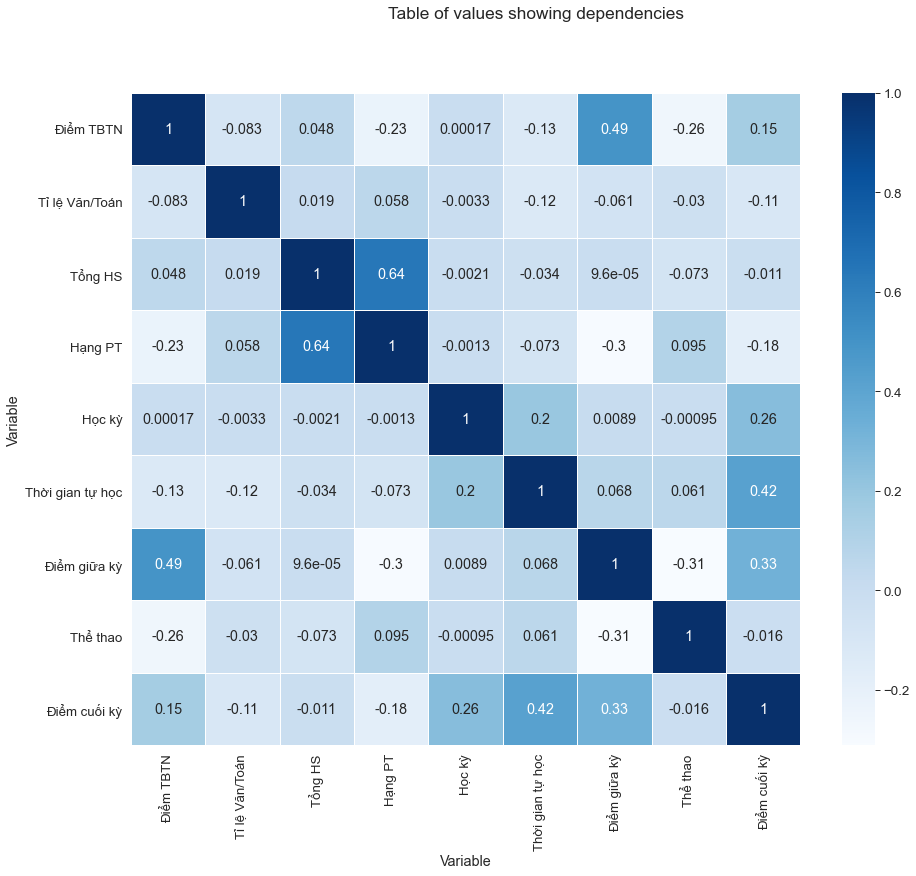

In [43]:
plt.figure(figsize=(15,12))
sns.set_context('paper', font_scale=1.5)
plt.suptitle('Table of values showing dependencies')
sns.heatmap(data_corr, annot=True, cmap='Blues',  linewidths=0.5, linecolor='white') #

# 2. Data Visualization

In [44]:
# Create table with colnames to count value of col
def create_table(colname):
    x = pd.DataFrame(df.groupby(colname)[colname].count())
    x.columns = ['Số lượng']
    return x

In [45]:
# gender table

sex = create_table('Giới tính')
sex

,Số lượng
Giới tính,
Nam,552
Nữ,179


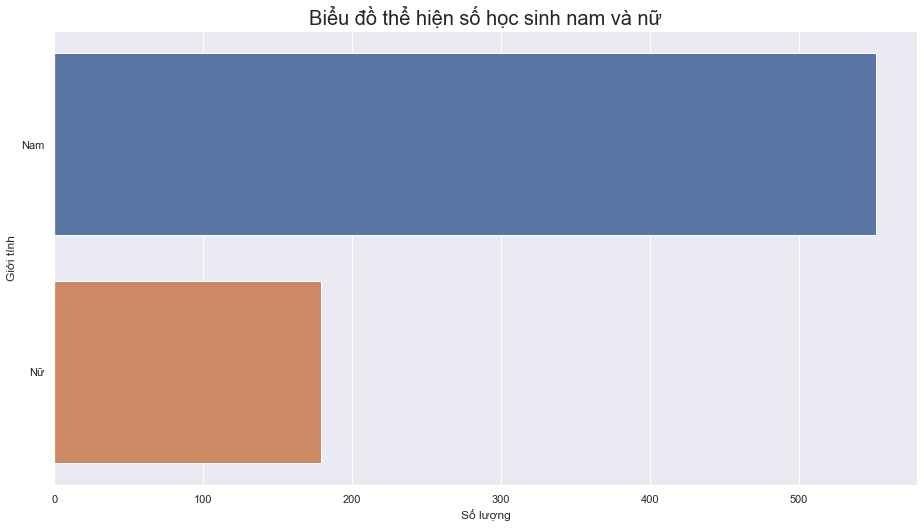

In [136]:
# Barplot sex

sex.reset_index(inplace= True)
sns.barplot(y='Giới tính',x='Số lượng',data = sex)
plt.title('Biểu đồ thể hiện số học sinh nam và nữ', fontsize = 20)
plt.tight_layout()

In [133]:
# Ethnic table

ethnic =  create_table('Dân tộc')
ethnic

,Số lượng
Dân tộc,
Khác,177
Kinh,554


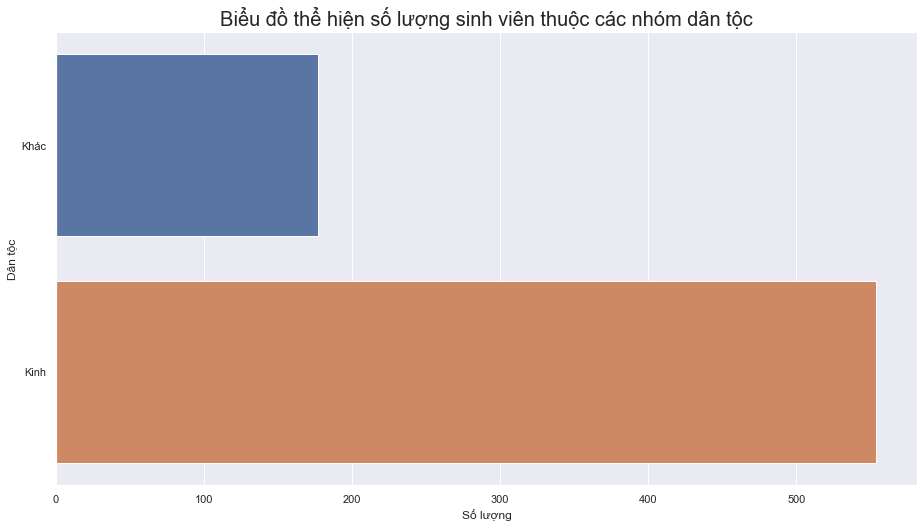

In [135]:
# Barplot ethnic

ethnic.reset_index(inplace= True)
sns.barplot(y='Dân tộc',x='Số lượng',data = ethnic)
plt.title('Biểu đồ thể hiện số lượng sinh viên thuộc các nhóm dân tộc', fontsize = 20)
plt.tight_layout()

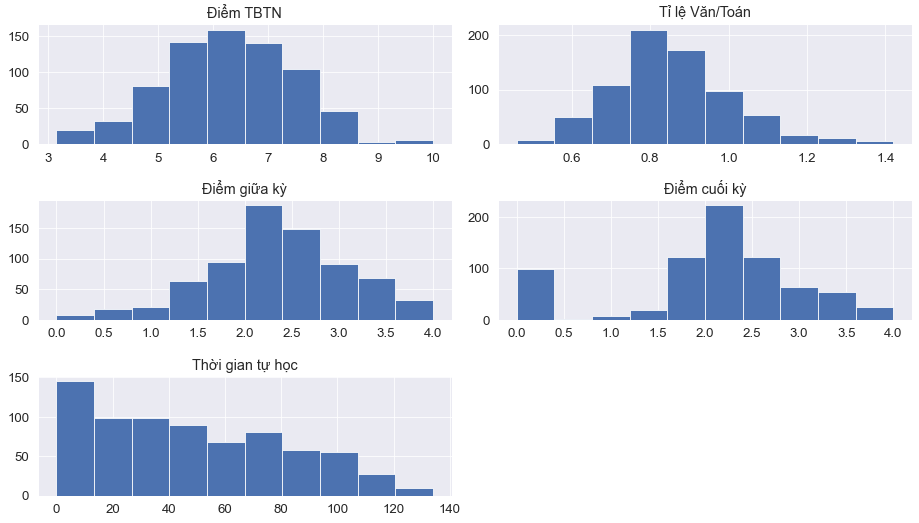

In [49]:
# All Quantitative variable histogram

df[quantitative].hist()
plt.tight_layout()

Text(0.5, 0.98, 'So sánh điểm giữa kỳ và điểm cuối kỳ')

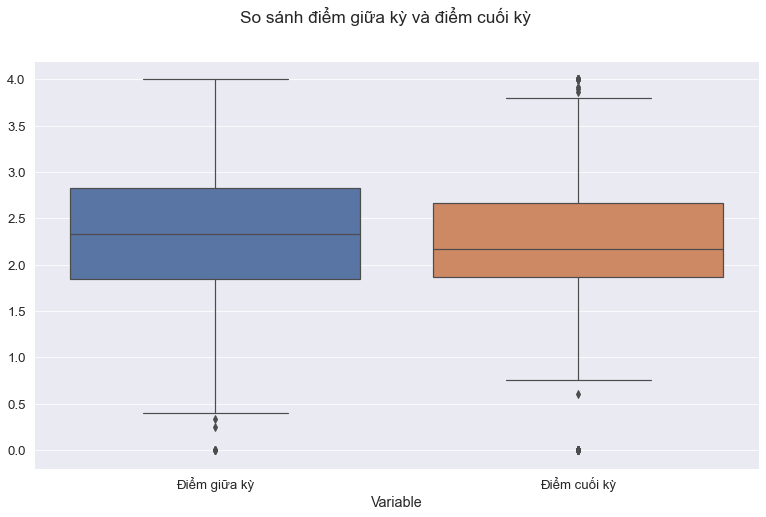

In [50]:
df1 = ['Điểm giữa kỳ','Điểm cuối kỳ']
data = df[df1]
sns.boxplot(data=data)
plt.suptitle('So sánh điểm giữa kỳ và điểm cuối kỳ')

Text(0.5, 0.98, 'Điểm kiểm tra của hai giới tính')

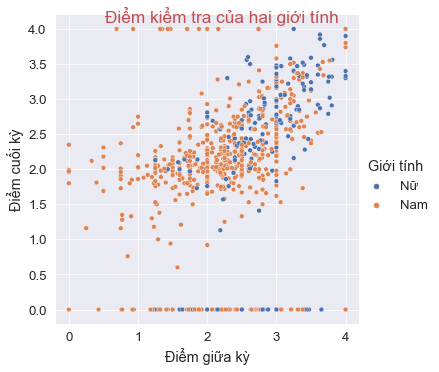

In [51]:
sns.relplot(data=df , x="Điểm giữa kỳ", y="Điểm cuối kỳ", hue=df['Giới tính'],kind='scatter')
plt.suptitle('Điểm kiểm tra của hai giới tính', color = 'r')

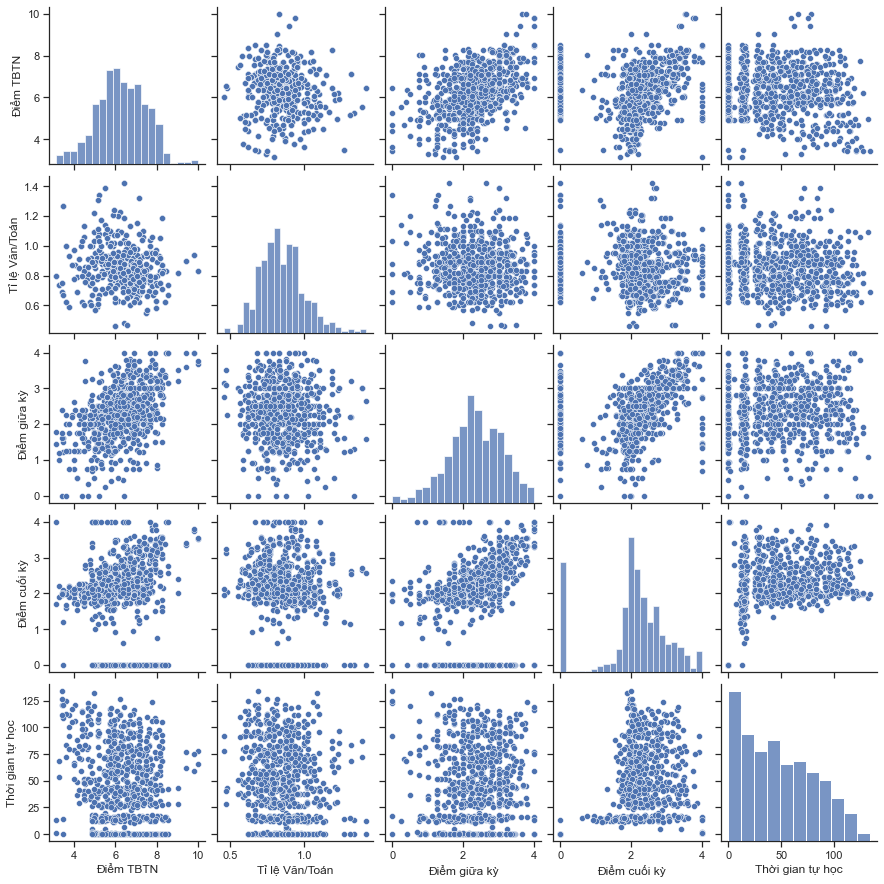

<Figure size 576x576 with 0 Axes>

<Figure size 260x150 with 0 Axes>

In [52]:
sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df[quantitative])
plt.figure(figsize=(8,8))
plt.figure(dpi=20)
plt.show()

# 3. T test

## 3.1 So sánh điểm trung bình cuối kỳ của sinh viên theo giới tính:

Phát biểu giả thuyết

**H0**: $\mu_1 = \mu_2$ Không có sự khác biệt về điểm số giữa hai giới tính

**H1:** $\mu_1 \ne \mu_2$ Có sự khác biệt về điểm số giữa hai giới tính
    

In [148]:
boy = df[df['Giới tính']=='Nam'].sample(30)['Điểm cuối kỳ']
boy.name = 'Nam'
girl = df[df['Giới tính']=='Nữ'].sample(30)['Điểm cuối kỳ']
girl.name = 'Nữ'

boy = boy.reset_index()['Nam']

girl = girl.reset_index()['Nữ']

In [149]:
df_sex = pd.DataFrame([boy,girl]).T
df_sex.sample(10)

,Nam,Nữ
2,3.05,3.56
28,2.29,2.44
19,0.00,3.35
14,2.00,3.40
24,2.07,1.76
16,1.92,2.91
3,1.65,0.00
11,2.76,2.76
17,1.68,2.04
9,2.57,2.81


In [150]:
stats, p = scipy.stats.ttest_ind(df_sex['Nam'], df_sex['Nữ'])
print('statistic =',stats,'\n','p =',p)
print("-"*40)
alpha = 0.05
if p < alpha:
    print('Bác bỏ giả thuyết H0. Điều này có nghĩa là có sự khác biệt về điểm số giữa hai giới tính ')    
else:
    print('Chưa đủ bằng chứng bác bỏ giả thuyết H0.Điều này ngụ ý không có sự khác biệt giữa hai giới tính .')

statistic = 0.10683192307178166 
 p = 0.9152909925522784
----------------------------------------
Chưa đủ bằng chứng bác bỏ giả thuyết H0.Điều này ngụ ý không có sự khác biệt giữa hai giới tính .


Text(0.5, 0.98, 'So sánh điểm cuối kỳ giữa hai giới tính')

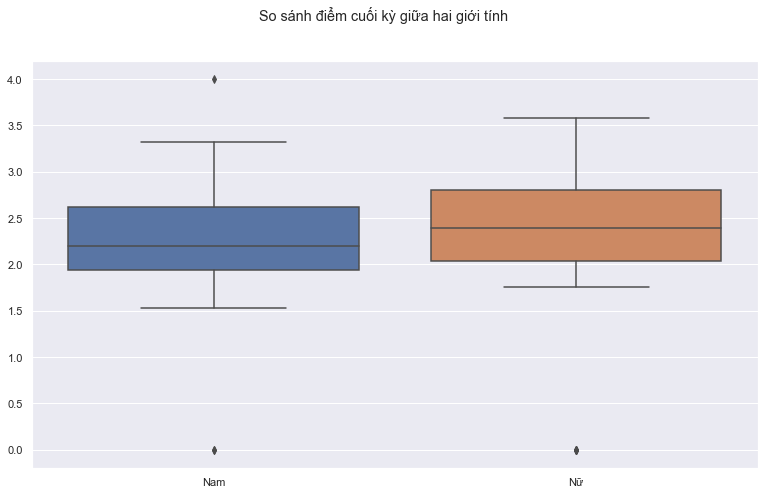

In [151]:
# Biểu đồ
sns.boxplot(data=df_sex)
plt.suptitle('So sánh điểm cuối kỳ giữa hai giới tính')

## 3.2 So sánh điểm trung bình cuối kỳ giữa sinh viên chơi thể thao và không chơi thể thao

**H0**: $\mu_1 = \mu_2$ Không có sự khác biệt về điểm số giữa hai nhóm

**H1:** $\mu_1 \ne \mu_2$ Có sự khác biệt về điểm số giữa hai nhóm

In [57]:
gr1 = df[df['Thể thao']== 0].sample(30)['Điểm cuối kỳ']
gr1.name = 'Chơi thể thao'
gr2 = df[df['Thể thao']== 1].sample(30)['Điểm cuối kỳ']
gr2.name = 'không chơi thể thao'

gr1 = gr1.reset_index()['Chơi thể thao']

gr2 = gr2.reset_index()['không chơi thể thao']

In [152]:
df_sport = pd.DataFrame([gr1,gr2]).T
df_sport.head()

,Chơi thể thao,không chơi thể thao
0,1.50,2.02
1,2.93,0.00
2,1.00,4.00
3,2.15,2.00
4,3.21,2.02


In [153]:
stats, p = scipy.stats.ttest_ind(df_sport['Chơi thể thao'], df_sport['không chơi thể thao'])
print('statistic =',stats,'\n','p =',p)
print("-"*40)
alpha = 0.05
if p < alpha:
    print('Bác bỏ giả thuyết H0. Điều này có nghĩa là có sự khác biệt về điểm số giữa sinh viên chơi thể thao và không chơi thể thao ')    
else:
    print('Chưa đủ bằng chứng bác bỏ giả thuyết H0.Điều này ngụ ý không có sự khác biệt giữa sinh viên chơi thể thao và không chơi thể thao .')

statistic = 1.0933722879576053 
 p = 0.27875078247236607
----------------------------------------
Chưa đủ bằng chứng bác bỏ giả thuyết H0.Điều này ngụ ý không có sự khác biệt giữa sinh viên chơi thể thao và không chơi thể thao .


Text(0.5, 0.98, 'So sánh điểm giữa kỳ và điểm cuối kỳ giữa các sinh viên có và không chơi thể thao')

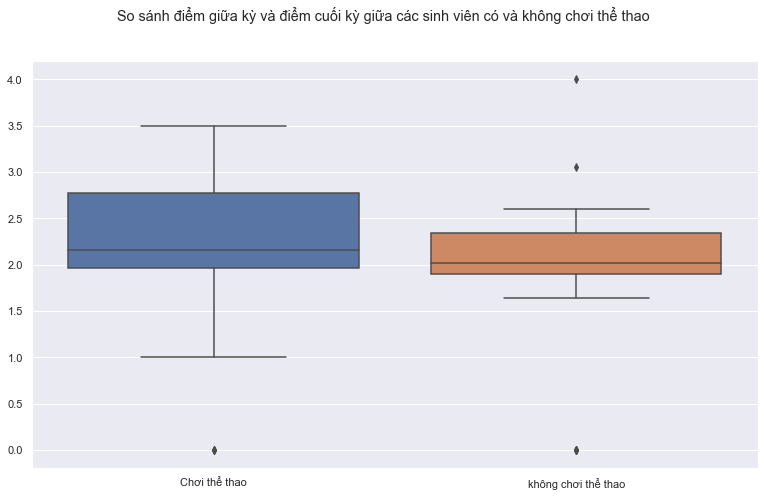

In [154]:
# Biểu đò
sns.boxplot(data=df_sport)
plt.suptitle('So sánh điểm giữa kỳ và điểm cuối kỳ giữa các sinh viên có và không chơi thể thao')

#  Chisquare

In [61]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'dof', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

## 4. Dùng kiểm định Chi2 để nghiên cứu sự ảnh hưởng của giới tính đến LetterGrade. 

**Nghiên cứu sự ảnh hưởng của giới tính đến kết quả cuối kỳ (LetterGrade).**

Phát biểu giả thiết:

- $H_0$: Giới tính không ảnh hưởng đến kết quả cuối kỳ (LetterGrade).
- $H_1$: Giới tính ảnh hưởng đến kết quả cuối kỳ (LetterGrade).

In [62]:
df_lg = pd.crosstab(index = df['Giới tính'], columns = df['LetterGrade'])
df_lg

LetterGrade,A,B,C,D,F
Giới tính,,,,,
Nam,18,77,353,31,73
Nữ,5,71,71,3,29


In [137]:
score,p_value,dof,expected = stats.chi2_contingency(df_lg)

In [138]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,63.355508,5.711872e-13,4,Chấp nhận H1 với mức ý nghĩa 0.05


**Nghiên cứu sự ảnh hưởng của giới tính đến StudyHours.**

Phát biểu giả thiết:

- $H_0$: Giới tính không ảnh hưởng đến Thời gian tự học.
- $H_1$: Giới tính ảnh hưởng đến Thời gian tự học.

In [139]:
df_sth = pd.crosstab(index = df['Giới tính'], columns = df['StudyHours'])
df_sth

StudyHours,Nhiều,Rất nhiều,Thấp,Trung bình
Giới tính,,,,
Nam,135,130,121,166
Nữ,30,51,42,56


In [140]:
score,p_value,dof,expected = stats.chi2_contingency(df_sth)

In [141]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,5.090003,0.165324,3,Chấp nhận H0 với mức ý nghĩa 0.05


## 5. Có nhận định cho rằng rằng thời gian tự học (StudyHours) có ảnh hưởng đến kết quả LetterGrade.

**Nghiên cứu sự ảnh hưởng của kết quả giữa kỳ đến kết quả cuối kỳ(LetterGrade).**

Phát biểu giả thiết:

- $H_0$: Thời gian tự học không ảnh hưởng đến kết quả cuối kỳ(LetterGrade).
- $H_1$: Thời gian tự học ảnh hưởng đến kết quả cuối kỳ(LetterGrade).

In [142]:
df_sh = pd.crosstab(index = df['StudyHours'], columns = df['LetterGrade'])
df_sh

LetterGrade,A,B,C,D,F
StudyHours,,,,,
Nhiều,2,33,126,4,0
Rất nhiều,3,47,128,3,0
Thấp,14,12,23,15,99
Trung bình,4,56,147,12,3


In [143]:
score,p_value,dof,expected = stats.chi2_contingency(df_sh)

In [144]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,452.221122,3.188022e-89,12,Chấp nhận H1 với mức ý nghĩa 0.05


## 6. Có nhận định cho rằng điểm kiểm tra giữa kỳ có ảnh hưởng đến điểm thi cuối kỳ.

**Nghiên cứu sự ảnh hưởng của thời gian tự học đến kết quả cuối kỳ(LetterGrade).**

Phát biểu giả thiết:

- $H_0$: Điểm giữa kỳ không ảnh hưởng đến kết quả cuối kỳ(LetterGrade).
- $H_1$: Điểm giữa kỳ học ảnh hưởng đến kết quả cuối kỳ(LetterGrade).

In [145]:
df_sco = pd.crosstab(index = df['Midterm'], columns = df['LetterGrade'])
df_sco

LetterGrade,A,B,C,D,F
Midterm,,,,,
A,5,11,0,0,3
B,7,104,80,6,24
C,4,32,257,13,51
D,5,1,68,9,17
F,2,0,19,6,7


In [146]:
score,p_value,dof,expected = stats.chi2_contingency(df_sco)

In [147]:
p = {}
p['score'] = score
p['p_value'] = p_value
p['dof'] = dof
results(p)

,score,p_value,dof,KetLuan
,244.487241,6.979232e-43,16,Chấp nhận H1 với mức ý nghĩa 0.05


# ANOVA


## Các phép kiểm định

In [118]:
def shapiro_test(data):
    print('Kiểm định Shapiro:')
    alpha = 0.05
    stat, p = shapiro(data)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
                
def kolmogorov(data):
    print("Kiểm định kolmogorov:")
    stat, p = kstest(rvs=data, cdf='norm',
                     args=(np.mean(data), np.std(data)))
    print('stat=%.3f, p=%.3f' % (stat, p))
        #print('k =',k , 'p =',p) 
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
              
def kd_thuan_nhat(list_check):
    print('>'*75,'\n','Kiểm tra tính thuần nhất:')
    print("1.Bartlett:") 
    stat, p = bartlett(list_check[0],list_check[1],list_check[2],list_check[3])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    
    print("2.Levene:")
    stat, p = levene(list_check[0],list_check[1],list_check[2],list_check[3])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    print(p < 0.05,'\n','~'*50)    

In [119]:
def dothi(data,x):
    
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))   
    dt = np.array(data)
    dt_chuan_hoa = (dt - np.mean(dt))/np.std(dt)
    plt.suptitle(data.name, color = 'r', fontsize = 22)
    sns.distplot(dt_chuan_hoa, ax = axes[0],color = "c")
    sm.qqplot(dt_chuan_hoa, line="45", ax = axes[1],color = "green")

# 7. So sánh điểm trung bình kết thúc học kỳ giữa các nhóm phân loại.


In [120]:
df['Phân loại'] = df['Giới tính'].astype(str) + ' - '+ df['Dân tộc']
df

Variable,Điểm TBTN,Tỉ lệ Văn/Toán,Tổng HS,Hạng PT,Giới tính,Dân tộc,Học kỳ,Thời gian tự học,StudyHours,Điểm giữa kỳ,Midterm,Thể thao,Điểm cuối kỳ,LetterGrade,Phân loại
Mã SV,,,,,,,,,,,,,,,
1,6.43,0.48,10,4,Nữ,Khác,2,43,Trung bình,2.25,C,0,2.04,C,Nữ - Khác
2,5.45,0.81,123,102,Nam,Kinh,1,28,Trung bình,2.20,C,0,2.03,C,Nam - Kinh
3,5.45,0.81,123,102,Nam,Kinh,2,43,Trung bình,1.60,D,0,2.09,C,Nam - Kinh
4,5.66,0.88,119,42,Nam,Kinh,1,0,Thấp,1.60,D,0,0.00,F,Nam - Kinh
5,5.66,0.88,119,42,Nam,Kinh,2,14,Thấp,1.29,D,0,1.78,C,Nam - Kinh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,8.18,0.75,177,53,Nam,Kinh,2,76,Rất nhiều,2.80,B,1,2.21,C,Nam - Kinh
728,7.06,0.84,322,168,Nam,Kinh,1,27,Trung bình,2.20,C,0,2.44,C,Nam - Kinh
729,7.06,0.84,322,168,Nam,Kinh,2,42,Trung bình,2.50,C,0,2.35,C,Nam - Kinh


In [121]:
df_type = df[['Phân loại', 'Điểm cuối kỳ']]
df_type

Variable,Phân loại,Điểm cuối kỳ
Mã SV,,
1,Nữ - Khác,2.04
2,Nam - Kinh,2.03
3,Nam - Kinh,2.09
4,Nam - Kinh,0.00
5,Nam - Kinh,1.78
...,...,...
727,Nam - Kinh,2.21
728,Nam - Kinh,2.44
729,Nam - Kinh,2.35


In [122]:
count_type = create_table('Phân loại')
count_type

,Số lượng
Phân loại,
Nam - Khác,140
Nam - Kinh,412
Nữ - Khác,37
Nữ - Kinh,142


In [123]:
# get sample
type1 = df[df['Phân loại']== 'Nam - Kinh'].sample(30)['Điểm cuối kỳ']
type1.name = 'Nam-Kinh'
type2 = df[df['Phân loại']== 'Nam - Khác'].sample(30)['Điểm cuối kỳ']
type2.name = 'Nam-Khác'
type3 = df[df['Phân loại']== 'Nữ - Kinh'].sample(30)['Điểm cuối kỳ']
type3.name = 'Nữ-Kinh'
type4 = df[df['Phân loại']== 'Nữ - Khác'].sample(30)['Điểm cuối kỳ']
type4.name = 'Nữ-Khác'
# reset index
type1 = type1.reset_index()[type1.name]
type2 = type2.reset_index()[type2.name]
type3 = type3.reset_index()[type3.name]
type4 = type4.reset_index()[type4.name]
# list 4 type
a = [type1,type2,type3,type4]

In [124]:
type_tab = pd.DataFrame(a).T
type_tab.head()

,Nam-Kinh,Nam-Khác,Nữ-Kinh,Nữ-Khác
0,2.11,2.46,3.13,0.00
1,2.86,0.00,2.90,0.00
2,2.25,2.00,2.34,3.50
3,1.71,1.89,2.41,1.86
4,2.41,1.90,2.77,0.00


In [125]:
x = 1
for i in a :
    print( '=='*30,'\n','Type',x,'check')
    shapiro_test(i) 
    kolmogorov(i)
    x +=1
kd_thuan_nhat(a)

 Type 1 check
Kiểm định Shapiro:
stat=0.884, p=0.004
Sample does not look Gaussian (reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.186, p=0.222
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Type 2 check
Kiểm định Shapiro:
stat=0.794, p=0.000
Sample does not look Gaussian (reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.240, p=0.053
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Type 3 check
Kiểm định Shapiro:
stat=0.878, p=0.003
Sample does not look Gaussian (reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.164, p=0.355
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Type 4 check
Kiểm định Shapiro:
stat=0.828, p=0.000
Sample does not look Gaussian (reject H0) 
 ................................................

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in 

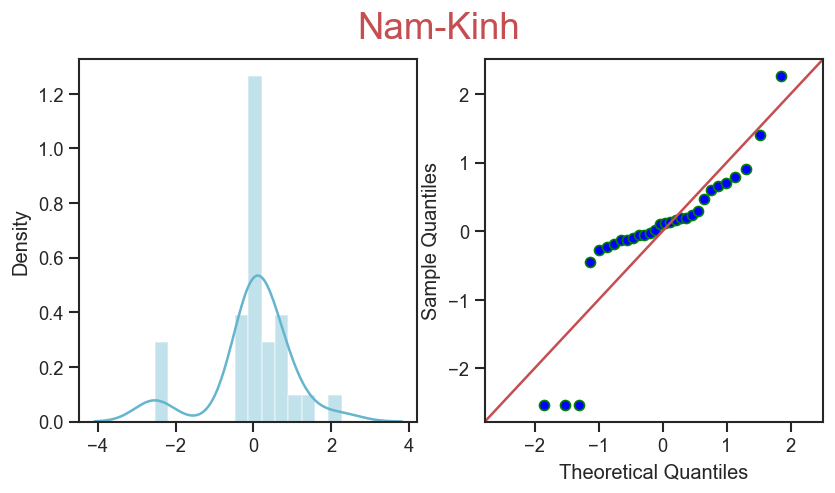

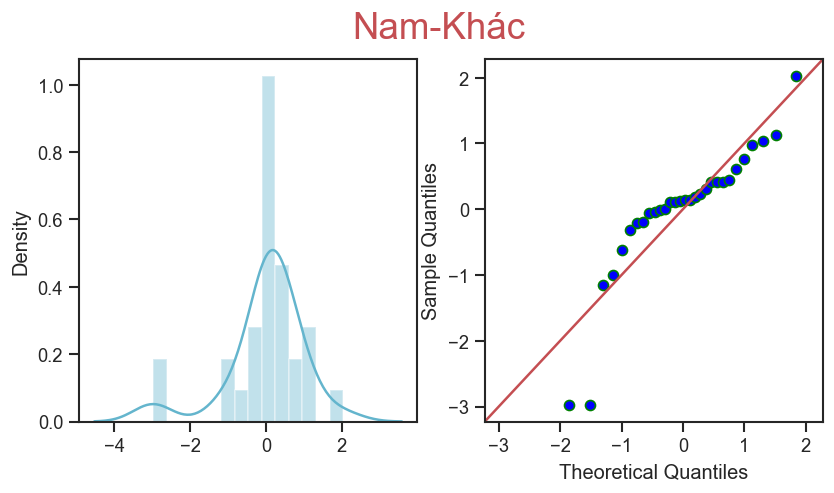

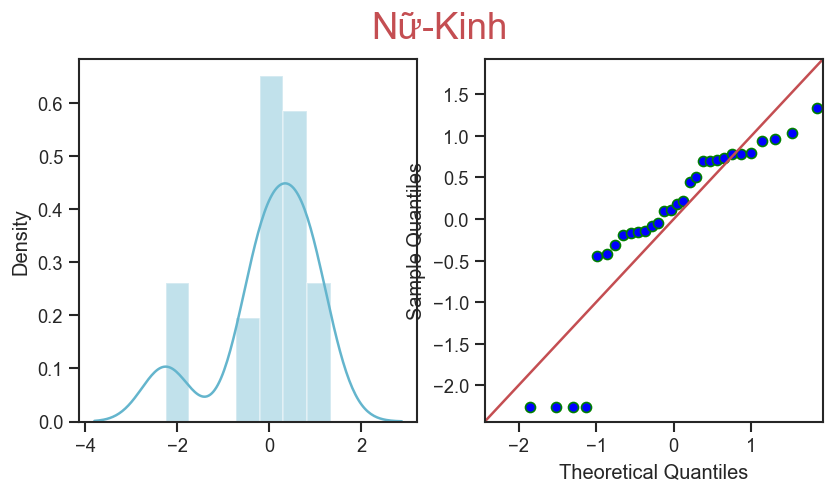

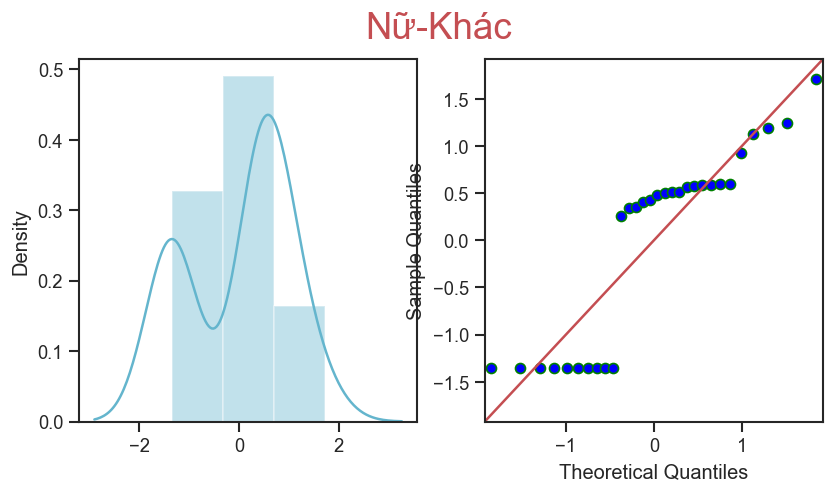

In [70]:
# Use histogram & qqplot to check for the normal distribution
x = 1
for i in a:
    dothi(i,x)
    x += 1

## Mẫu ở đây không chuẩn nên không thể tiếp tục kiểm định ANOVA

Phát biểu giả thiết:

- $H_0$: Không có sự khác biệt về điểm cuối kỳ giữa các sinh viên được phân loại.
- $H_1$: Có sự khác biệt về điểm cuối kỳ giữa các sinh viên được phân loại.

In [89]:
diemcuoiky = []
phanloai = []

for i in type1:
    phanloai.append(1)
    diemcuoiky.append(i)
    
for i in type2:
    phanloai.append(2)
    diemcuoiky.append(i)

for i in type3:
    phanloai.append(3)
    diemcuoiky.append(i)
    
for i in type4:
    phanloai.append(4)
    diemcuoiky.append(i)

In [94]:
diem_pl = pd.DataFrame([diemcuoiky,phanloai]).T
diem_pl.columns = ['diemcuoiky','phanloai']
diem_pl.head()

,diemcuoiky,phanloai
0,2.06,1.0
1,4.00,1.0
2,0.00,1.0
3,2.09,1.0
4,2.21,1.0


In [99]:
# ANOVA one-way
alpha = 0.05
fvalue, pvalue = f_oneway(type1,type2,type3,type4)
print('f_value =',fvalue,'p_value =',pvalue)
if (pvalue < alpha):
    print('Bác bỏ giả thuyết H0. Có sự khác biệt giữa các sinh viên được phân loại')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Không có sự khác biệt giữa các sinh viên được phân loại')

f_value = 5.506474841957878 p_value = 0.0014290234068397945
Bác bỏ giả thuyết H0. Có sự khác biệt giữa các sinh viên được phân loại


In [97]:
# ANOVA table
model = ols('diemcuoiky ~ C(phanloai)', data = diem_pl).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(phanloai),15.008363,3.0,5.506475,0.001429
Residual,105.389273,116.0,NaN,NaN


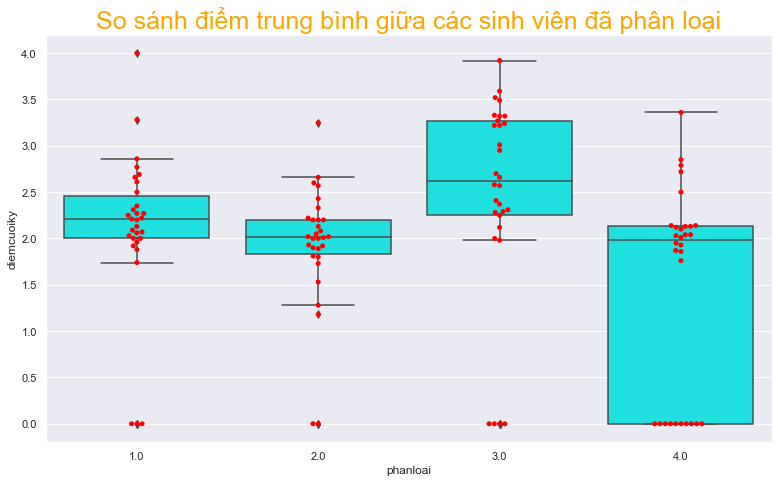

In [155]:
sns.boxplot(x='phanloai', y='diemcuoiky', data=diem_pl, color='cyan')
sns.swarmplot(x='phanloai', y='diemcuoiky', data=diem_pl, color='red')
plt.title('So sánh điểm trung bình giữa các sinh viên đã phân loại', size=25, color = 'orange')
plt.show()

In [98]:
# Hậu ANOVA

tukey = pairwise_tukeyhsd(endog=diem_pl['diemcuoiky'],
                          groups=diem_pl['phanloai'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-0.1797,0.8756,-0.8212,0.4619,False
1.0,3.0,0.353,0.4813,-0.2886,0.9946,False
1.0,4.0,-0.6287,0.0571,-1.2702,0.0129,False
2.0,3.0,0.5327,0.1394,-0.1089,1.1742,False
2.0,4.0,-0.449,0.2673,-1.0906,0.1926,False
3.0,4.0,-0.9817,0.001,-1.6232,-0.3401,True


# Kiểm định Kruskal - Wallis

**Bởi vì phân phối trên không được chuẩn, ta sử dụng kiểm dịnh Kruskal - Wallis để thay cho kiểm định ANOVA**

Phát biểu giả thiết:

- $H_0$: Không có sự khác biệt về điểm cuối kỳ giữa các sinh viên được phân loại.
- $H_1$: Có sự khác biệt về điểm cuối kỳ giữa các sinh viên được phân loại.

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

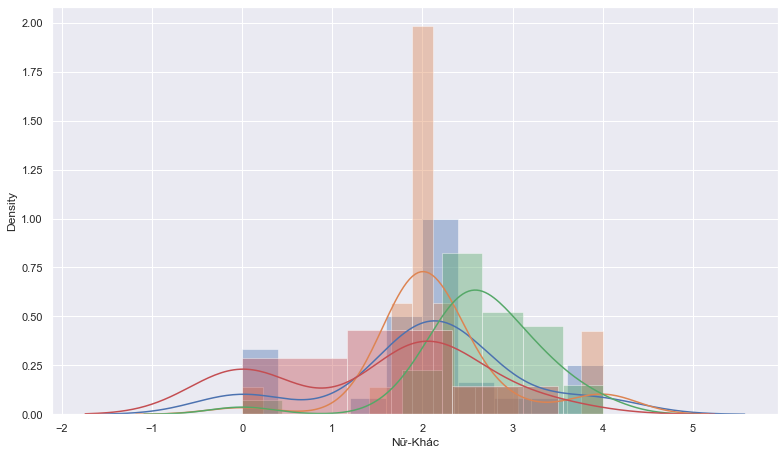

In [126]:
# Biểu đồ histogram

for col in type_tab.columns:
    sns.distplot(type_tab[col])

plt.show()

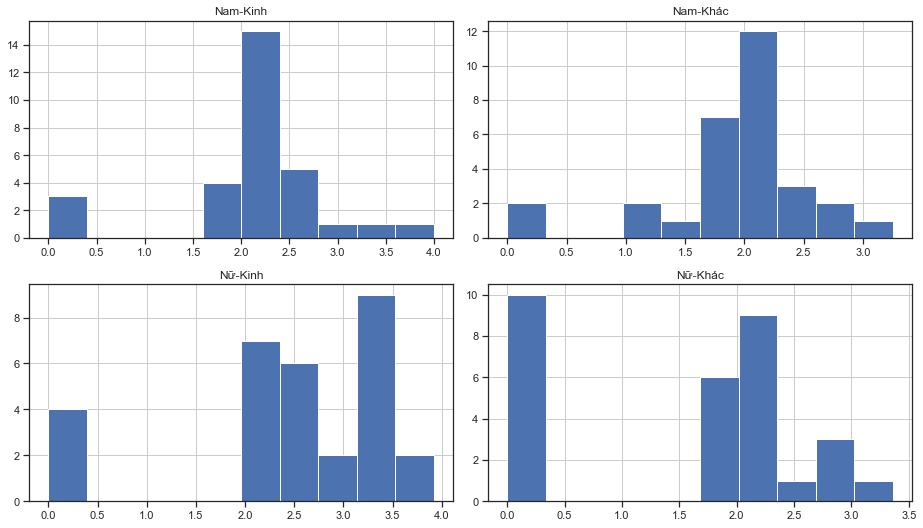

In [104]:
type_tab[type_tab.columns].hist()
plt.tight_layout()

In [107]:
# Kruskal - Wanllis
alpha = 0.05
fvalue, pvalue = kruskal(type1,type2,type3,type4)
print('f_value =',fvalue,'p_value =',pvalue)
if (pvalue < alpha):
    print('Bác bỏ giả thuyết H0. Có sự khác biệt giữa các sinh viên được phân loại')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Không có sự khác biệt giữa các sinh viên được phân loại')

f_value = 21.653797917102537 p_value = 7.699569461883637e-05
Bác bỏ giả thuyết H0. Có sự khác biệt giữa các sinh viên được phân loại


# Sử dụng ANOVA để so sánh điểm trung bình cuối HK1 và HK2

In [71]:
hk1 = df[df['Học kỳ']== 1]['Điểm cuối kỳ']
hk1.name = 'Điểm cuối kỳ 1'
hk2 = df[df['Học kỳ']== 2]['Điểm cuối kỳ']
hk2.name = 'Điểm cuối kỳ 2'

hk1 = hk1.reset_index()[hk1.name]
hk2 = hk2.reset_index()[hk2.name]

In [72]:
hk12 = pd.DataFrame([hk1,hk2]).T
hk12.head()

,Điểm cuối kỳ 1,Điểm cuối kỳ 2
0,2.03,2.04
1,0.00,2.09
2,0.00,1.78
3,2.35,2.00
4,0.00,2.41


In [156]:
a = [hk1.sample(30),hk2.sample(30)]
x = 1
for i in a :
    print( '=='*30,'\n','Điểm học kỳ',x,'_check')
    shapiro_test(i) 
    kolmogorov(i)
    x +=1

 Điểm học kỳ 1 _check
Kiểm định Shapiro:
stat=0.860, p=0.001
Sample does not look Gaussian (reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.238, p=0.057
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Điểm học kỳ 2 _check
Kiểm định Shapiro:
stat=0.971, p=0.556
Sample looks Gaussian (fail to reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.136, p=0.591
Sample looks Gaussian (fail to reject H0) 
 ..................................................


C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in 

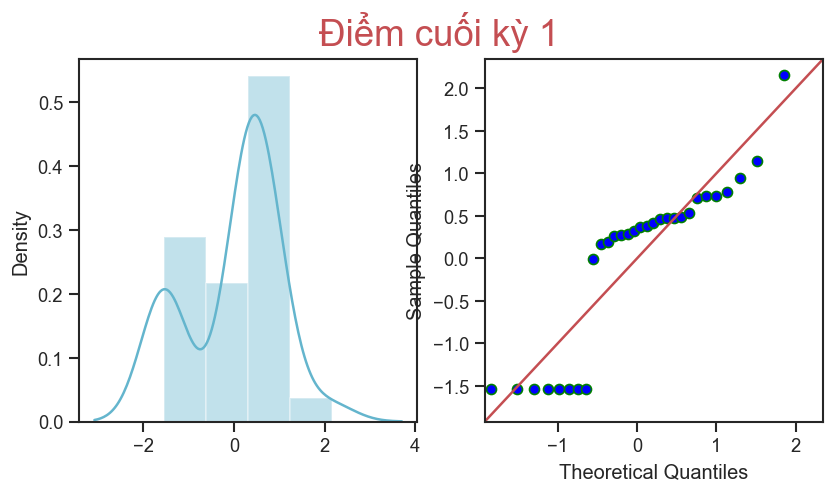

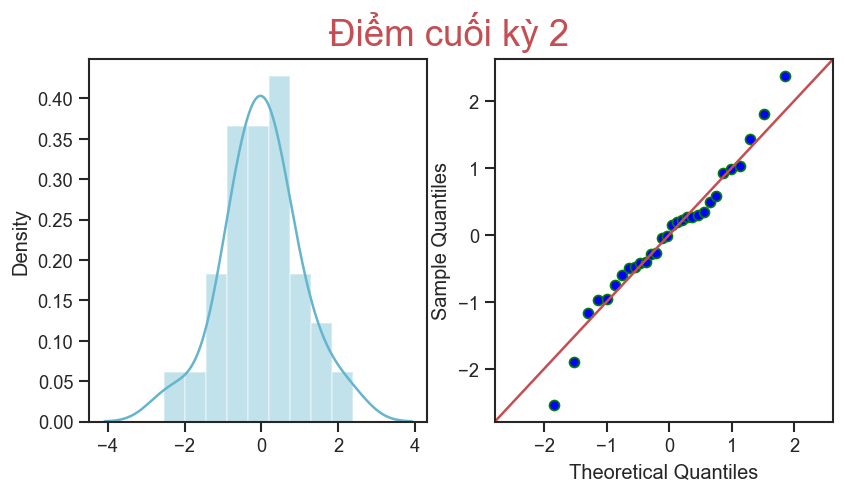

In [74]:
x = 1
for i in a:
    dothi(i,x)
    x += 1

## Vì mẫu dùng để kiểm định chưa chuẩn nên không thể tiếp tục kiểm định ANOVA

# Sử dụng Kiểm định Kruskal - Wallis để thay thế cho kiểm định ANOVA

Phát biểu giả thiết:

- $H_0$: Không có sự khác biệt giữa điểm cuối kỳ 1 các điểm cuối kỳ 2.
- $H_1$: Có sự khác biệt về điểm cuối kỳ 1 và điểm cuối kỳ 2.

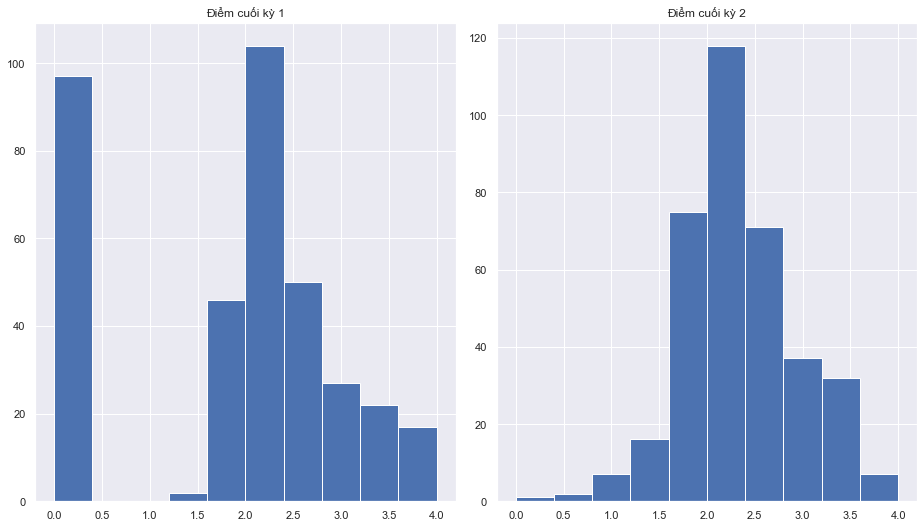

In [108]:
hk12[hk12.columns].hist()
plt.tight_layout()

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


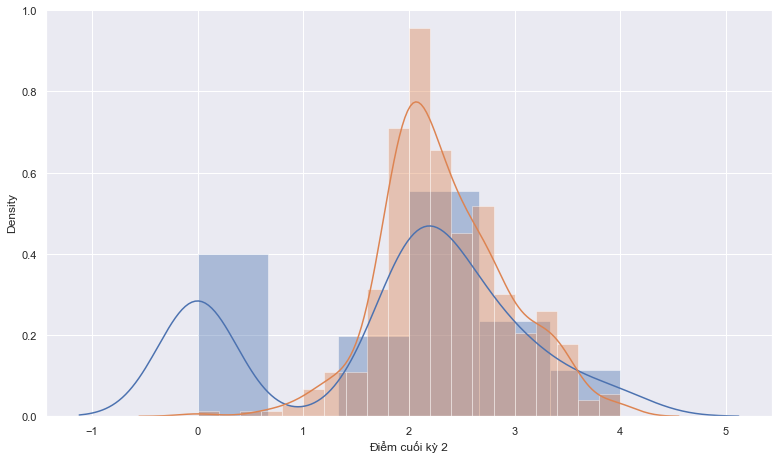

In [109]:
for col in hk12.columns:
    sns.distplot(hk12[col])

plt.show()

In [111]:
# Kruskal - Wanllis
alpha = 0.05
fvalue, pvalue = kruskal(hk1,hk2)
print('f_value =',fvalue,'p_value =',pvalue)
if (pvalue < alpha):
    print('Bác bỏ giả thuyết H0. Có sự khác biệt giữa điểm trung bình học kỳ 1 và học kỳ 2')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Không có sự khác biệt giữa điểm trung bình học kỳ 1 và học kỳ 2')

f_value = 17.90266597075552 p_value = 2.3249519904542768e-05
Bác bỏ giả thuyết H0. Có sự khác biệt giữa điểm trung bình học kỳ 1 và học kỳ 2


## Sử dụng ANOVA để so sánh tỉ lệ Văn/Toán giữa nữ và nam


In [249]:
boy_sco = df[df['Giới tính'] == 'Nam'].sample(30)['Tỉ lệ Văn/Toán']
boy_sco.name = 'Tỉ lệ V/T Nam'
girl_sco = df[df['Giới tính']== 'Nữ'].sample(30)['Tỉ lệ Văn/Toán']
girl_sco.name = 'Tỉ lệ V/T Nữ'

boy_sco = boy_sco.reset_index()[boy_sco.name]
girl_sco = girl_sco.reset_index()[girl_sco.name]

In [250]:
score_vt = pd.DataFrame([boy_sco,girl_sco]).T
score_vt.head()

,Tỉ lệ V/T Nam,Tỉ lệ V/T Nữ
0,0.80,0.76
1,0.71,0.76
2,1.00,0.69
3,1.03,0.74
4,0.62,1.03


In [251]:
a = [boy_sco,girl_sco]

x = 1
for i in a :
    print( '=='*30,'\n',i.name,'_check')
    shapiro_test(i) 
    kolmogorov(i)
    x +=1

 Tỉ lệ V/T Nam _check
Kiểm định Shapiro:
stat=0.960, p=0.307
Sample looks Gaussian (fail to reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.127, p=0.674
Sample looks Gaussian (fail to reject H0) 
 ..................................................
 Tỉ lệ V/T Nữ _check
Kiểm định Shapiro:
stat=0.969, p=0.511
Sample looks Gaussian (fail to reject H0) 
 ..................................................
Kiểm định kolmogorov:
stat=0.105, p=0.865
Sample looks Gaussian (fail to reject H0) 
 ..................................................


In [253]:
def kd_thuan_nhat(list_check):
    print('>'*75,'\n','Kiểm tra tính thuần nhất:')
    print("1.Bartlett:") 
    stat, p = bartlett(list_check[0],list_check[1])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    
    print("2.Levene:")
    stat, p = levene(list_check[0],list_check[1])
    print('stat =',stat ,'p =',p)
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n','.'*50)
    else:
        print('Sample does not look Gaussian (reject H0)','\n','.'*50)
    print(p < 0.05,'\n','~'*50)    
kd_thuan_nhat(a)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
 Kiểm tra tính thuần nhất:
1.Bartlett:
stat = 4.552208406767803 p = 0.03287631660193265
Sample does not look Gaussian (reject H0) 
 ..................................................
2.Levene:
stat = 1.697223371556917 p = 0.19780042435849665
Sample looks Gaussian (fail to reject H0) 
 ..................................................
False 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in 

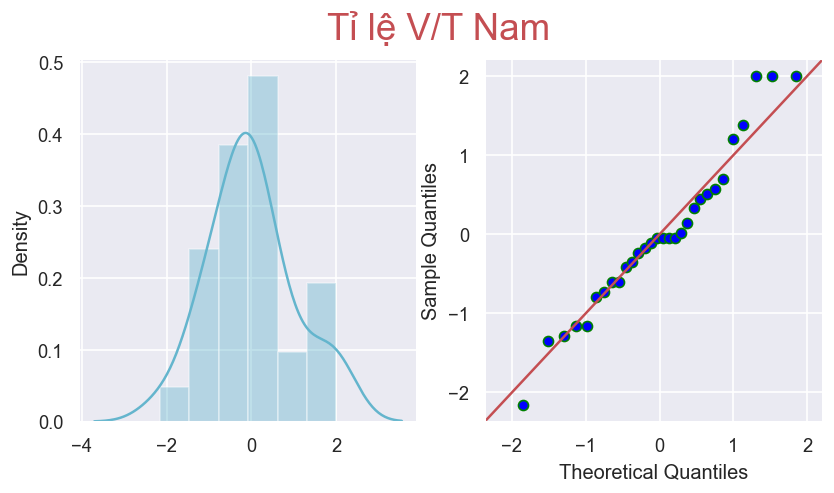

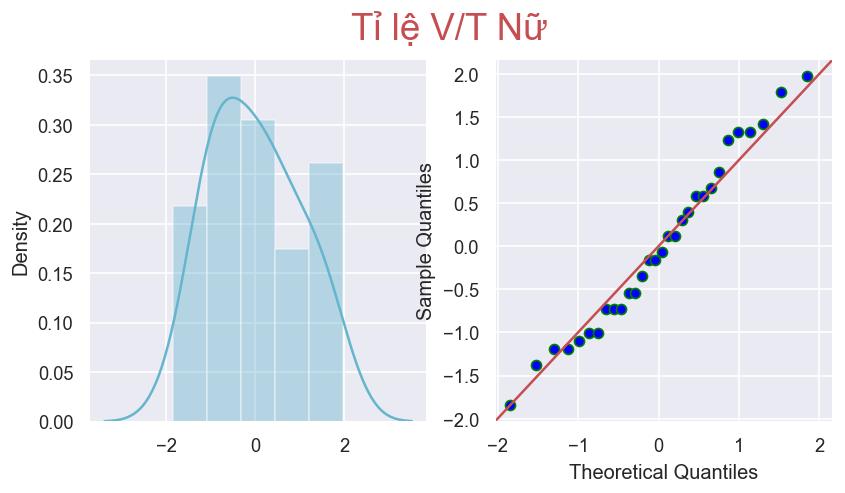

In [254]:
x = 1
for i in a:
    dothi(i,x)
    x += 1

Phát biểu giả thiết:

- $H_0$: Không có sự khác biệt về tỉ lệ văn/toán giữa hai giới tính.
- $H_1$: Có sự khác biệt về tỉ lệ văn/toán giữa hai giới tính.

In [255]:
ratio = []
gender = []

for i in boy_sco:
    gender.append(1)
    ratio.append(i)
    
for i in girl_sco:
    gender.append(0)
    ratio.append(i)

In [256]:
data = pd.DataFrame([ratio,gender]).T
data.columns = ['Ratio','Gender']
data.head()

,Ratio,Gender
0,0.80,1.0
1,0.71,1.0
2,1.00,1.0
3,1.03,1.0
4,0.62,1.0


In [257]:
# ANOVA one-way
alpha = 0.05
fvalue, pvalue = f_oneway(score_vt['Tỉ lệ V/T Nam'],score_vt['Tỉ lệ V/T Nữ'])
print('f_value =',fvalue,'p_value =',pvalue)
if (pvalue < alpha):
    print('Bác bỏ giả thuyết H0. Có sự khác biệt về tỉ lệ điểm Văn/Toán giữa nam và nữ')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Không có sự khác biệt về tỉ lệ điểm Văn/Toán giữa nam và nữ')

f_value = 5.006134513474238 p_value = 0.029114373284768475
Bác bỏ giả thuyết H0. Có sự khác biệt về tỉ lệ điểm Văn/Toán giữa nam và nữ


In [258]:
# ANOVA table
model = ols('Ratio ~ C(Gender)', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Gender),0.096802,1.0,5.006135,0.029114
Residual,1.121523,58.0,NaN,NaN


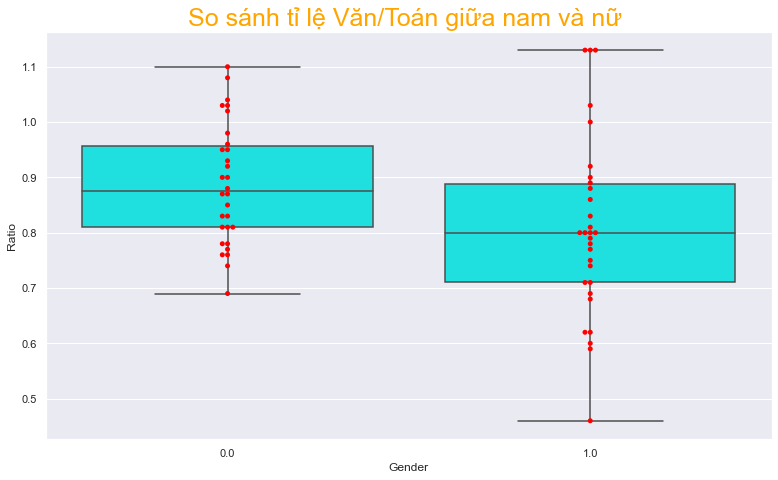

In [259]:
sns.boxplot(x='Gender', y='Ratio', data=data, color='cyan')
sns.swarmplot(x='Gender', y='Ratio', data=data, color='red')
plt.title('So sánh tỉ lệ Văn/Toán giữa nam và nữ ', size=25, color = 'orange')
plt.show()

## Hậu ANOVA

In [260]:
tukey = pairwise_tukeyhsd(endog=data['Ratio'],
                          groups=data['Gender'],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,-0.0803,0.0291,-0.1522,-0.0085,True


## Từ bảng Tukey và biểu đồ boxplot kết luận: Nữ có tỉ lệ Văn/Toán cao hơn so với nam